## Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis
### Problem Statement

In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

### Objective

This project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.

### Research Question

Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

### Loading the DataSet

In [2]:
df = pd.read_csv('2020_Yellow_Taxi_Trip_Data.csv')

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


# Explortatory Data Analysis

**Dataset Description**
![data_dictionary.png](attachment:149f80aa-9050-4567-8055-df20f3e72a68.png)
#### ism Data ko Explore karenge
    Clean 
    Transform
    Explore
    Extract 
    Need Necessary 

In [4]:
df.shape

(24648499, 18)

In [5]:
df_slice = df.iloc[:6000000]

In [6]:
df_slice.shape

(6000000, 18)

In [7]:
df_slice.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


#### Step:1 aisa koun sa feature hai jo payment type ko effect karta hai  
    jub bhi cab me jate hai to koun koun se factors hai jisme fare amount depend karta hai 
    Distance 
    Duration

    - Duration data set me nahi hai to duration find karenge kyunki duration yahan pe fare ka factor hai
    


In [8]:
## Check Data Type is correct or not of date and time 
df_slice.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [9]:
#Change Data type of the tpep_pickup_datetime 	tpep_dropoff_datetime Date 
df_slice['tpep_pickup_datetime'] = pd.to_datetime(df_slice['tpep_pickup_datetime'])
df_slice['tpep_dropoff_datetime'] = pd.to_datetime(df_slice['tpep_dropoff_datetime'])

In [10]:
df_slice.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [11]:
df_slice['duration'] = df_slice['tpep_dropoff_datetime'] - df_slice['tpep_pickup_datetime']

In [12]:
df_slice['duration'] 

0         0 days 00:04:48
1         0 days 00:07:25
2         0 days 00:06:11
3         0 days 00:04:51
4         0 days 00:02:18
                ...      
5999995   0 days 00:17:33
5999996   0 days 00:05:12
5999997   0 days 00:12:59
5999998   0 days 00:08:31
5999999   0 days 00:04:55
Name: duration, Length: 6000000, dtype: timedelta64[ns]

In [13]:
df_slice['duration']= df_slice['duration'].dt.total_seconds()/60

In [14]:
df_slice['duration']

0           4.800000
1           7.416667
2           6.183333
3           4.850000
4           2.300000
             ...    
5999995    17.550000
5999996     5.200000
5999997    12.983333
5999998     8.516667
5999999     4.916667
Name: duration, Length: 6000000, dtype: float64

In [15]:
df_slice

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999995,1.0,2020-01-30 15:11:32,2020-01-30 15:29:05,1.0,2.0,1.0,N,100,246,1.0,12.5,2.5,0.5,2.00,0.0,0.3,17.80,2.5,17.550000
5999996,1.0,2020-01-30 15:30:29,2020-01-30 15:35:41,1.0,0.9,1.0,N,246,90,1.0,5.5,2.5,0.5,2.60,0.0,0.3,11.40,2.5,5.200000
5999997,1.0,2020-01-30 15:38:59,2020-01-30 15:51:58,1.0,1.2,1.0,N,186,170,1.0,9.5,2.5,0.5,2.55,0.0,0.3,15.35,2.5,12.983333
5999998,1.0,2020-01-30 15:53:36,2020-01-30 16:02:07,1.0,2.7,1.0,N,170,79,2.0,10.5,2.5,0.5,0.00,0.0,0.3,13.80,2.5,8.516667


In [16]:
## Remove unwanted columns 
## Extract the features which is usefull
## When We use list of feature extraction we should use to 2d array in case of Pandas 
df_slice = df_slice[['passenger_count', 'payment_type', 'fare_amount', 'trip_distance', 'duration']] 

In [17]:
df_slice

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.2,4.800000
1,1.0,1.0,7.0,1.2,7.416667
2,1.0,1.0,6.0,0.6,6.183333
3,1.0,1.0,5.5,0.8,4.850000
4,1.0,2.0,3.5,0.0,2.300000
...,...,...,...,...,...
5999995,1.0,1.0,12.5,2.0,17.550000
5999996,1.0,1.0,5.5,0.9,5.200000
5999997,1.0,1.0,9.5,1.2,12.983333
5999998,1.0,2.0,10.5,2.7,8.516667


In [17]:
df_slice.isnull().sum()

passenger_count    12999
payment_type       12999
fare_amount            0
trip_distance          0
duration               0
dtype: int64

In [18]:
# For percentage
(12999/len(df_slice))*100

0.21665

In [19]:
df_slice.dropna(inplace = True)

In [20]:
df_slice.isnull().sum()

passenger_count    0
payment_type       0
fare_amount        0
trip_distance      0
duration           0
dtype: int64

In [21]:
df_slice

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.2,4.800000
1,1.0,1.0,7.0,1.2,7.416667
2,1.0,1.0,6.0,0.6,6.183333
3,1.0,1.0,5.5,0.8,4.850000
4,1.0,2.0,3.5,0.0,2.300000
...,...,...,...,...,...
5999995,1.0,1.0,12.5,2.0,17.550000
5999996,1.0,1.0,5.5,0.9,5.200000
5999997,1.0,1.0,9.5,1.2,12.983333
5999998,1.0,2.0,10.5,2.7,8.516667


In [22]:
df_slice['passenger_count'] = df_slice['passenger_count'].astype('int64')

df_slice['payment_type'] = df_slice['payment_type'].astype('int64')

In [23]:
#baki ke features karne k baad humare pass jo bhi features honge usme duplicates value aa jate hai 
df_slice[df_slice.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2064,1,2,7.0,0.00,0.000000
2451,1,1,52.0,0.00,0.200000
2456,2,1,9.5,1.70,13.066667
2476,1,1,4.0,0.40,3.083333
3358,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
5999994,1,1,11.0,2.21,13.466667
5999995,1,1,12.5,2.00,17.550000
5999996,1,1,5.5,0.90,5.200000
5999997,1,1,9.5,1.20,12.983333


In [25]:
df_slice.drop_duplicates(inplace = True )

In [26]:
df_slice.shape

(2881703, 5)

#### jub bhi data ko clean karte hai uske baad check karna hai ki 
#### Data ka Contribution Or distribution Nikalna hai 
#### categorical ke liye bhi or numerical ke liye bhi 

In [40]:
## Removing Outliers Zero and minimum values 
## For Categorical Data 
df_slice['passenger_count'].value_counts(normalize = True)

1    0.619458
2    0.203524
3    0.070971
5    0.067496
4    0.038551
Name: passenger_count, dtype: float64

In [39]:
### uper 0, 7, 8 , 9, me passenger ke counts bahoot kum hai  
### to inhe remove karna hai 

In [41]:
df_slice['payment_type'].value_counts(normalize = True) 

1    0.685125
2    0.314875
Name: payment_type, dtype: float64

In [33]:
### uper payment type me hume 1 and 2 ko hi lena hai 3, 4 ko remove karna hai.

In [34]:
# payment type less then 3 wale ko hi lenge pure rows me 
df_slice = df_slice[df_slice['payment_type']<3]
df_slice = df_slice[(df_slice['passenger_count']>0)&(df_slice['passenger_count']<6)]

In [37]:
df_slice.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1,6.0,1.2,4.800000
1,1,1,7.0,1.2,7.416667
2,1,1,6.0,0.6,6.183333
3,1,1,5.5,0.8,4.850000
4,1,2,3.5,0.0,2.300000


In [54]:
df_slice['payment_type'].replace([1,2], ['Card', 'Cash'], inplace = True)

In [55]:
df_slice

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
5999969,1,Card,16.0,2.20,24.133333
5999985,1,Card,26.5,6.63,34.366667
5999987,2,Card,13.0,2.98,15.666667
5999993,1,Card,28.5,8.32,32.800000


In [56]:
# descriptive statistics for data
df_slice.describe() # describe ka use karke niche sare ka value nikal sakte hai 

,passenger_count,fare_amount,trip_distance,duration
count,2.195067e+06,2.195067e+06,2.195067e+06,2.195067e+06
mean,1.786807e+00,1.250687e+01,2.816318e+00,1.445842e+01
std,1.210067e+00,5.689993e+00,1.928772e+00,7.213842e+00
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,8.000000e+00,1.360000e+00,8.933333e+00
50%,1.000000e+00,1.150000e+01,2.300000e+00,1.373333e+01
75%,2.000000e+00,1.600000e+01,3.770000e+00,1.921667e+01
max,5.000000e+00,3.750000e+01,8.780000e+00,3.548333e+01


In [57]:
## remove the Nagative values 

df_slice = df_slice[df_slice['fare_amount']>0]
df_slice = df_slice[df_slice['trip_distance']>0]
df_slice = df_slice[df_slice['duration']>0]


In [58]:
df_slice.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.195067e+06,2.195067e+06,2.195067e+06,2.195067e+06
mean,1.786807e+00,1.250687e+01,2.816318e+00,1.445842e+01
std,1.210067e+00,5.689993e+00,1.928772e+00,7.213842e+00
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,8.000000e+00,1.360000e+00,8.933333e+00
50%,1.000000e+00,1.150000e+01,2.300000e+00,1.373333e+01
75%,2.000000e+00,1.600000e+01,3.770000e+00,1.921667e+01
max,5.000000e+00,3.750000e+01,8.780000e+00,3.548333e+01


(array([3.02100e+04, 4.60185e+05, 5.64929e+05, 5.15557e+05, 2.84811e+05,
        2.00076e+05, 1.01105e+05, 3.61960e+04, 1.70700e+03, 2.91000e+02]),
 array([1.0000e-02, 3.7590e+00, 7.5080e+00, 1.1257e+01, 1.5006e+01,
        1.8755e+01, 2.2504e+01, 2.6253e+01, 3.0002e+01, 3.3751e+01,
        3.7500e+01]),
 <BarContainer object of 10 artists>)

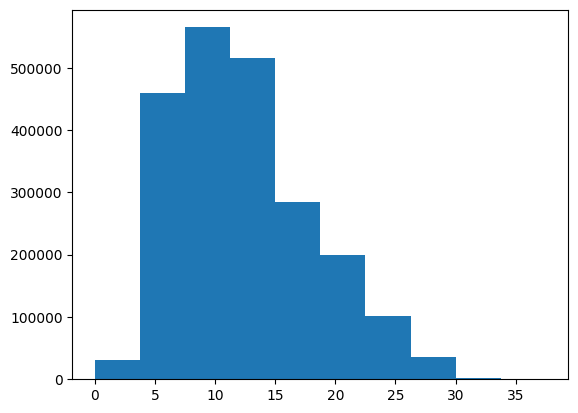

In [59]:
## Check outliers in visually jinko remove karna hi hai 
plt.hist(df_slice['fare_amount'])


{'whiskers': [<matplotlib.lines.Line2D at 0x14d5c6e7fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x14d5c724400>,
 'boxes': [<matplotlib.lines.Line2D at 0x14d5c6e7d00>],
 'medians': [<matplotlib.lines.Line2D at 0x14d5c724940>],
 'fliers': [<matplotlib.lines.Line2D at 0x14d5c724be0>],
 'means': []}

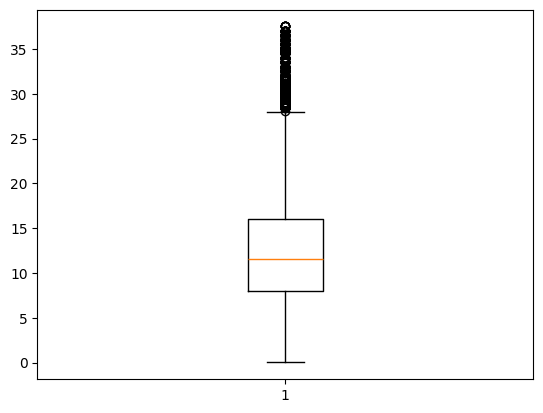

In [60]:
plt.boxplot(df_slice['fare_amount'])

In [40]:
### Above Box plot me outliers 4000 tak gaya hai or range me data kum hai 
## to outliers ko remove karna hai 
## Ab outliers remove karne ka 2 way hai Z Score ya InterQuartile Range 
## ISpe Inter Quartile ka use karenge kyunki Data Kuch Khas Normal Distributed nahi lag raha jisme ki Z Score ka use kiya jaye
## Related nahi 

In [61]:
for col in ['fare_amount', 'trip_distance', 'duration']:
    q1 = df_slice[col].quantile(0.25)
    q3 = df_slice[col].quantile(0.75)
    IQR = q3-q1

    lower_bound = q1-1.5*IQR
    upper_bound = q3+1.5*IQR

    df_slice = df_slice[(df_slice[col] >= lower_bound) & (df_slice[col]<=upper_bound)]


In [62]:
df_slice

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
5999965,2,Cash,14.0,2.12,21.633333
5999967,1,Cash,10.5,3.17,5.366667
5999969,1,Card,16.0,2.20,24.133333
5999987,2,Card,13.0,2.98,15.666667


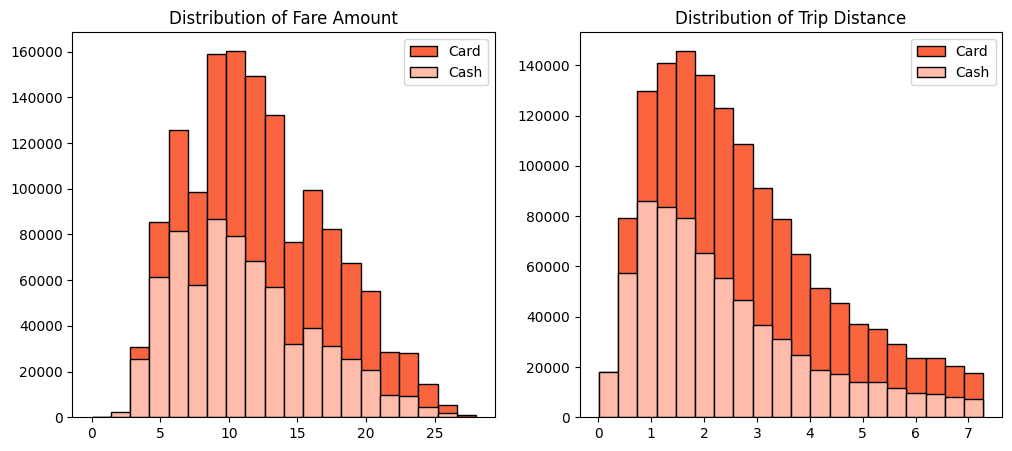

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           12.260612  5.031823      2.688507  1.631408
Cash           11.120810  4.911447      2.372334  1.602684

In [63]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of Fare Amount')
plt.hist(df_slice[df_slice['payment_type']=='Card']['fare_amount'], histtype='barstacked', bins = 20, edgecolor = 'k', color = '#FA643F', label = 'Card')
plt.hist(df_slice[df_slice['payment_type']=='Cash']['fare_amount'],  histtype='barstacked',bins = 20, edgecolor = 'k', color = '#FFBCAB',label = 'Cash')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of Trip Distance')
plt.hist(df_slice[df_slice['payment_type']=='Card']['trip_distance'], histtype='barstacked', bins = 20, edgecolor = 'k',color = '#FA643F',label = 'Card')
plt.hist(df_slice[df_slice['payment_type']=='Cash']['trip_distance'],  histtype='barstacked',bins = 20, edgecolor = 'k', color = '#FFBCAB',label = 'Cash')
plt.legend()
plt.show()

# calculating the mean and standard deviation group by on payment type 
df_slice.groupby('payment_type').agg({'fare_amount': ['mean', 'std',], 'trip_distance': ['mean', 'std'],})

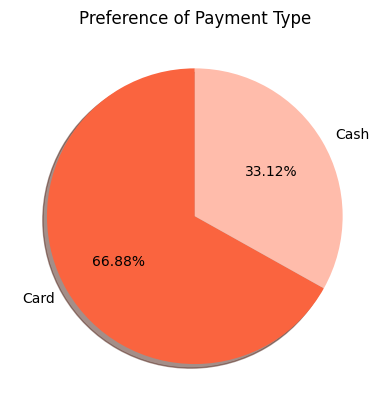

In [66]:
## Using Documentation to generate Pie Chart 
plt.title('Preference of Payment Type')
plt.pie(df_slice['payment_type'].value_counts(normalize = True), labels = df_slice['payment_type'].value_counts().index,
       startangle = 90,shadow = True, autopct = '%1.2f%%', colors = ['#FA643F','#FFBCAB'])
plt.show()

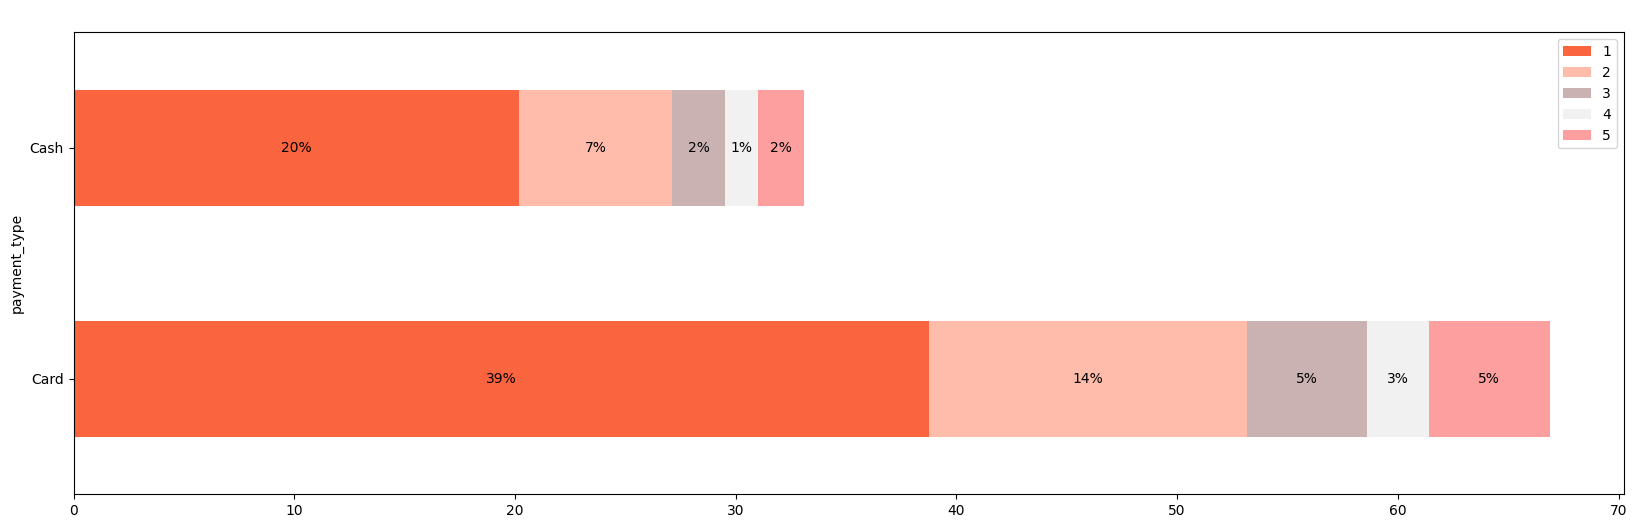

In [67]:
# calculating the total passenger count distribution based on the different payment type
passenger_count = df_slice.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

# renaming the passenger_count to count to reset the index
passenger_count.rename(columns = {'passenger_count':'count'},inplace = True)
passenger_count.reset_index(inplace = True)

# calculating the percentage of the each passenger count
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100

# creating a new empty dataframe to store the distribution of each payment type (useful for the visualization)
df_slice = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
df_slice['payment_type'] = ['Card','Cash']
df_slice.iloc[0,1:] = passenger_count.iloc[:5,-1]
df_slice.iloc[1,1:] = passenger_count.iloc[5:,-1]

fig, ax = plt.subplots(figsize=(20, 6)) 
df_slice.plot(x='payment_type', kind='barh', stacked=True, title=' ', ax=ax, color = ['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F'] )

# Add percentage text
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

## Hypothesis Testing

In order to select the most suitable test for our scenario, our initial step involves evaluating whether the distribution of fare amounts adheres to a normal distribution. While the histogram depicted above suggests otherwise, we will further confirm this by generating a QQ plot.

Quantile-quantile (QQ) plots can be used to assess whether the fare amount distributions for each payment type are approximately normally distributed. If the data points closely align with the diagonal line in the plot, it suggests that the data follows a normal distribution.


In [73]:
import statsmodels.api as sm

In [75]:

#create Q-Q plot with 45-degree line added to plot
## use the Q-Q Plot for check wether data is normally distributed or not 
fig = sm.qqplot(df_slice['fare_amount'], line='45')
plt.show()

KeyError: 'fare_amount'

In [ ]:
# sample 1
credit_card = df_slice[df_slice['payment_type'] == 'Card']['fare_amount']

# sample 2
cash = df_slice[df_slice['payment_type'] == 'Cash']['fare_amount']

# performing t test on both the different sample
t_stat, p_value = stats.ttest_ind(a=credit_card, b=cash, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# comparing the p value with the significance of 5% or 0.05
if p_value < 0.05:
    print("\nReject the null hypothesis")
else:
    print("\nAccept the null hypothesis")